# Notebook solving Titanic problem for kaggle challenge

Final score at Kaggle 0.78468
https://www.kaggle.com/c/titanic/

In [31]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#SCIKIT LEARN CLASSIFIERS
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [32]:
# vars
dataset_train_file = 'Titanic_dataset/train.csv'
dataset = pd.read_csv(dataset_train_file)

#Load the data
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
#Get a count of the number of survivors  
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

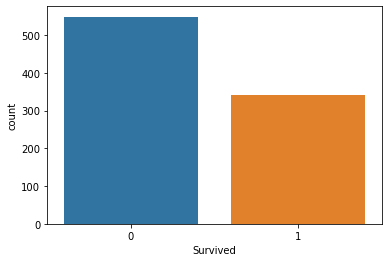

In [35]:
#Visualize the count of number of survivors
sns.countplot(dataset['Survived'], label="Count")

In [36]:
who = []

for data in dataset.iterrows():
    if data[1]['Age'] < 16:
        who.append('child')
    else:
        if data[1]['Sex'] == 'female':
            who.append('female')
        else:
            who.append('man')
dataset['Who'] = pd.Series(who)

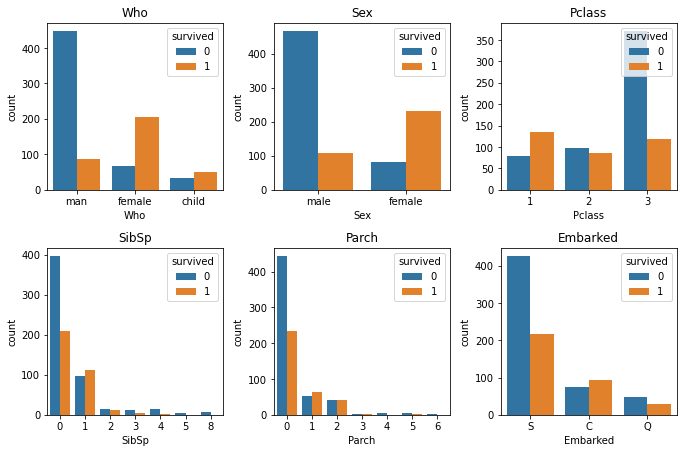

In [37]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
# Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
cols = ['Who', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(dataset[cols[i]], hue=dataset["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

In [38]:
#Look at survival rate by sex
dataset.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [39]:
#Look at survival rate by sex and class
dataset.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


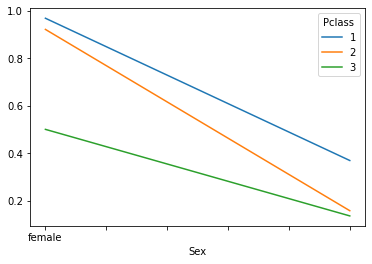

In [40]:
#Look at survival rate by sex and class visually
dataset.pivot_table('Survived', index='Sex', columns='Pclass').plot()

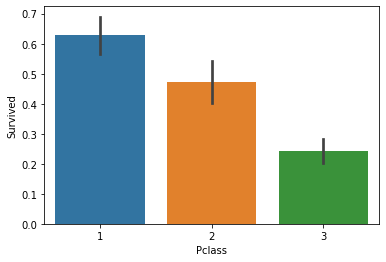

In [41]:
#Plot the survival rate of each class.
sns.barplot(x='Pclass', y='Survived', data=dataset)

In [42]:
#Look at survival rate by sex, age and class
age = pd.cut(dataset['Age'], [0, 16, 80])
dataset.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 16]   0.833333  1.000000  0.545455
       (16, 80]  0.974684  0.906250  0.420290
male   (0, 16]   1.000000  0.818182  0.270270
       (16, 80]  0.377551  0.068182  0.129630

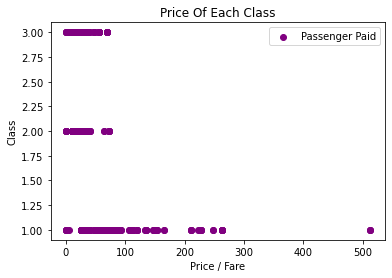

In [43]:
#Plot the Prices Paid Of Each Class
plt.scatter(dataset['Fare'], dataset['Pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [44]:
#Count the empty (NaN, NAN, na) values in each column 
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Who              0
dtype: int64

In [45]:
# Drop the columns
dataset = dataset.drop(['Name', 'Cabin', 'PassengerId', 'Who', 'Ticket'], axis = 1)

#Remove the rows with missing values
dataset = dataset.dropna(subset =['Embarked', 'Age']) # 

# dataset['Age'].fillna(int(dataset['Age'].dropna().median()), inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [46]:
#Look at all of the values in each column & get a count 
for val in dataset:
    print(dataset[val].value_counts())
    print()

0    424
1    288
Name: Survived, dtype: int64

3    355
1    184
2    173
Name: Pclass, dtype: int64

male      453
female    259
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
9.4750      1
13.4167     1
61.3792     1
14.1083     1
8.0292      1
Name: Fare, Length: 219, dtype: int64

S    554
C    130
Q     28
Name: Embarked, dtype: int64



In [47]:
dataset.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [48]:
#Print the unique values in the columns
print(dataset['Sex'].unique())
print(dataset['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [49]:
from sklearn.preprocessing import LabelEncoder

def transform_LabelEcoder(dataset, columns):
    # transform data to numeric
    for col in columns :
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])
    return dataset

dataset = transform_LabelEcoder(dataset, ['Sex', 'Embarked'])

#Print the NEW unique values in the columns
print(dataset['Sex'].unique())
print(dataset['Embarked'].unique())

dataset.head()

[1 0]
[2 0 1]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [50]:
#Split the data into independent 'X' and dependent 'Y' variables
X = dataset.iloc[:, 1:8].values 
Y = dataset.iloc[:, 0].values

# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.001, random_state = 0)

In [51]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 0.9097668 , -1.3250713 , -0.11346338,  0.52297853,  0.6654212 ,
        -0.38152996,  0.52005219]])

In [52]:
def scikit_model():
    models = []
    models.append(('SVC_RBF', SVC(kernel='rbf', random_state=0)))
    models.append(('SVM Linear', SVC(kernel="linear", random_state = 0)))
    models.append(('KNN=3', KNeighborsClassifier(3, metric = 'minkowski', p=2)))
    models.append(('KNN=5', KNeighborsClassifier(5, metric = 'minkowski', p=2)))
    models.append(('Gaussian', GaussianProcessClassifier(1.0 * RBF(1.0))))
    models.append(('DTREE', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
    models.append(('RANDOM FOREST', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)))
    models.append(('MLP', MLPClassifier(alpha=1, max_iter=1000)))
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('NAIVE BAYES', GaussianNB()))
    models.append(('DISCRIMINANT', QuadraticDiscriminantAnalysis()))
    models.append(('LogisticRegression', LogisticRegression(random_state = 0)))
    return models


def train_scikit(models, X_train, X_test, Y_train, Y_test):
    trained_models = []
    for name,model in models:
        model.fit(X_train, Y_train)
        trained_models.append(model)
        print('\n %s' % name)
        print('The accuracy of the {} classifier on training data is \t\t{:>12}'.format(name, model.score(X_train, Y_train)))
        print('The accuracy of the {} classifier on test data is \t\t{:>12}'.format(name, model.score(X_test, Y_test)))
    return trained_models

In [53]:
trained_models = train_scikit(scikit_model(), X_train, X_test, Y_train, Y_test)


 SVC_RBF
The accuracy of the SVC_RBF classifier on training data is 		0.8424753867791842
The accuracy of the SVC_RBF classifier on test data is 		         1.0

 SVM Linear
The accuracy of the SVM Linear classifier on training data is 		0.7805907172995781
The accuracy of the SVM Linear classifier on test data is 		         0.0

 KNN=3
The accuracy of the KNN=3 classifier on training data is 		0.8677918424753868
The accuracy of the KNN=3 classifier on test data is 		         1.0

 KNN=5
The accuracy of the KNN=5 classifier on training data is 		0.8663853727144867
The accuracy of the KNN=5 classifier on test data is 		         0.0

 Gaussian
The accuracy of the Gaussian classifier on training data is 		0.8396624472573839
The accuracy of the Gaussian classifier on test data is 		         1.0

 DTREE
The accuracy of the DTREE classifier on training data is 		0.9859353023909986
The accuracy of the DTREE classifier on test data is 		         1.0

 RANDOM FOREST
The accuracy of the RANDOM FOR

In [54]:
#Get the importance of the features
forest = trained_models[6]
importances = pd.DataFrame({'feature':dataset.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.317
Fare,0.275
Sex,0.209
Pclass,0.078
SibSp,0.059
Parch,0.037
Embarked,0.025


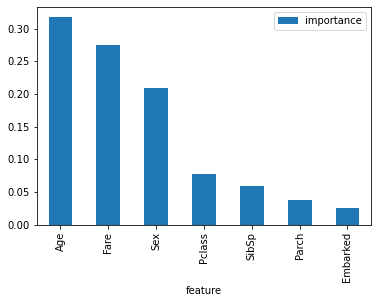

In [55]:
#Visualize the importance
importances.plot.bar()

In [56]:
dataset_test_file = 'Titanic_dataset/test.csv'
dataset_test = pd.read_csv(dataset_test_file)

#Count the empty (NaN, NAN, na) values in each column 
dataset_test.isna().sum()

# Drop the columns
dataset_test = dataset_test.drop(['Name', 'Cabin', 'PassengerId',  'Ticket'], axis = 1)

dataset_test_X = transform_LabelEcoder(dataset_test, ['Sex', 'Embarked'])

dataset_test_X['Age'].fillna(int(dataset_test_X['Age'].dropna().mean()), inplace=True)
dataset_test_X['Fare'].fillna(int(dataset_test_X['Fare'].dropna().median()), inplace=True)

dataset_test_X = sc.transform(dataset_test_X)

In [57]:
results = []

for i in range(12):   
    result = trained_models[i].predict(dataset_test_X)
    results.append(result)

predictions = {'PassengerId': [],
                'Survived': []
              }

start_id = 892
for passanger_id in range(len(results[0])):
    scores = []
    for r in results:
        scores.append(r[passanger_id])
    
    predictions['PassengerId'].append(start_id)
    predictions['Survived'].append(pd.Series(scores).mode()[0])
    start_id += 1


df = pd.DataFrame(predictions, columns = ['PassengerId', 'Survived'])
df.to_csv(r'Titanic_dataset/pred_titanic.csv', index = False)